# QUIZ 3

MINE-4101: Applied Data Science  
Univerisdad de los Andes  

**Business context:** HabitAlpes es una startup Colombiana que está armando un portafolio de servicios de consultoría para los propietarios de vivienda y para el gobierno distrital. Entre sus diferentes proyectos se encuentran el soporte para avalúo de los precios de vivienda, la compra, remodelación y reventa de propiedades en la capital del país, consultoría y elaboración de contratos de arrendamiento, correcciones de avalúos catastrales e informes de sugerencia de reclasificación de estratos en barrios de diferentes localidades de la ciudad. Adicionalmente, la empresa busca ser efectiva al momento de ofrecer a sus clientes el portafolios de servicios más conveniente según sus necesidades.

HabitAlpes quiere comenzar con la construcción de una herramienta de cálculo de precio de venta para apartamentos de la ciudad, de tal manera que sus clientes puedan ingresar la información de sus respectivos apartamentos y obtener un valor estimado sugerido que esté de acuerdo con las características y ubicación del mismo, y en línea con los precios de venta de propiedades similares en el sector que le permitan ser competitivos.


In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

C:\Users\rudaf\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rudaf\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

## 1. Carga de los datos

In [3]:
apts_df = pd.read_csv('./data/apartamentos.csv')

In [4]:
apts_df.shape

(43013, 46)

In [5]:
apts_df.dtypes

_id                         object
codigo                      object
tipo_propiedad              object
tipo_operacion              object
precio_venta               float64
area                       float64
habitaciones               float64
banos                      float64
administracion             float64
parqueaderos               float64
sector                      object
estrato                    float64
antiguedad                  object
latitud                    float64
longitud                   float64
direccion                   object
descripcion                 object
website                     object
last_view                   object
datetime                    object
url                         object
timeline                    object
estado                      object
compañia                    object
precio_arriendo            float64
jacuzzi                    float64
piso                       float64
closets                    float64
chimenea            

In [6]:
apts_df.sample(5)

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
4784,66d86c91ceda690e85509a10,2412-M4753372,APARTAMENTO,VENTA,810000000.0,141.00,2.0,3.0,805000.0,2.0,CHICO,6.0,MAS DE 20 ANOS,4.671749,-74.050835,NaN,"area construida 141 mts, area privada 126.25 m...",metrocuadrado.com,2024-08-03 02:18:27.660,2024-07-04 04:03:06.987,NaN,[],USADO,OPORTUNIDADES INMOBILIARIAS,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,CHAPINERO,S.C. EL CHICO,Calle 85,977.85,0,PARQUE VECINAL URBANIZACIÓN LA CABRERA,192.77,1
23833,66d86d4dceda690e8550e479,603-M4994974,APARTAMENTO,ARRIENDO,NaN,7.00,3.0,2.0,NaN,0.0,ENGATIVA,3.0,MAS DE 20 ANOS,4.688000,-74.109000,NaN,"apartamento de tres alcobas, sala comedor, coc...",metrocuadrado.com,2024-07-11 09:39:32.059,2024-07-08 01:51:03.047,NaN,[],USADO,RECORRIDOS,1100000.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,ENGATIVA,VILLALUZ,Portal El Dorado,1546.88,0,PARQUE VECINAL URBANIZACIÓN FLORENCIA I SECTOR,1492.86,0
33422,66d86defceda690e855109ee,2214-M5080974,APARTAMENTO,ARRIENDO,NaN,47.00,2.0,1.0,150000.0,0.0,FONTIBON TINTAL,3.0,ENTRE 0 Y 5 ANOS,4.656469,-74.134380,NaN,apartamento en alquiler en hayuelos apartament...,metrocuadrado.com,2024-08-09 08:56:48.432,2024-08-03 11:16:59.492,NaN,[],USADO,ACRECER SAS,1350000.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,FONTIBON,EL PROVEEDOR,Normandía,2725.23,0,PARQUE VECINAL VILLA ALSACIA,1308.03,0
2919,66d86c88ceda690e855092c7,16108-M4996531,APARTAMENTO,VENTA,528000000.0,62.04,3.0,2.0,400600.0,1.0,COLINA Y ALREDEDORES,4.0,ENTRE 10 Y 20 ANOS,4.727642,-74.065834,NaN,"en venta apartamento en club house, piso 12, ...",metrocuadrado.com,2024-08-13 15:00:24.558,2024-07-04 02:04:59.758,NaN,[],USADO,READY TO MARKET RTM SAS,NaN,0.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,False,SUBA,IBERIA PORTOALEGRE,Gratamira,986.01,0,PARQUE VECINAL PRADO PINZÓN,1336.59,0
32307,66d86ddaceda690e85510593,72-M5105683,APARTAMENTO,ARRIENDO,NaN,50.00,1.0,2.0,320000.0,1.0,SANTA BARBARA,6.0,ENTRE 10 Y 20 ANOS,4.689000,-74.053000,NaN,"excelente apartamento ubicado en el piso 4, cu...",metrocuadrado.com,2024-08-13 23:15:41.486,2024-08-03 06:08:35.377,NaN,[],USADO,ESPACIOS URBANOS,3200000.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False,USAQUEN,SANTA BIBIANA,Calle 106,565.79,0,PARQUE VECINAL URBANIZACIÓN NORMANDIA I II II ...,1444.56,0


In [7]:
apts_df.columns

Index(['_id', 'codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'area', 'habitaciones', 'banos', 'administracion', 'parqueaderos',
       'sector', 'estrato', 'antiguedad', 'latitud', 'longitud', 'direccion',
       'descripcion', 'website', 'last_view', 'datetime', 'url', 'timeline',
       'estado', 'compañia', 'precio_arriendo', 'jacuzzi', 'piso', 'closets',
       'chimenea', 'permite_mascotas', 'gimnasio', 'ascensor',
       'conjunto_cerrado', 'piscina', 'salon_comunal', 'terraza', 'vigilancia',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm', 'parque_cercano',
       'distancia_parque_m', 'is_cerca_parque'],
      dtype='object')

## 2. Entendimiento y limpieza de los datos

Para entrenar un modelo de regresión todas las variables de entrada (features) deben ser numéricas. Se seleccionan las variables numéricas que se consideran más importantes para la estimación de la variable objetivo (target) `precio_venta`. 

Adicionalmente, tanto las variables de entrada como la variable objetivo no deben contener valores vacíos. Se decide eliminar los registros que tengan valores vacíos en algunas de estas, dado que el experto recomienda no realizar ninguna imputación.


In [8]:
features = ['area','parqueaderos','habitaciones','estrato','administracion',
            'distancia_estacion_tm_m', 'distancia_parque_m','gimnasio', 'ascensor',
            'conjunto_cerrado', 'piscina', 'vigilancia','antiguedad','is_cerca_estacion_tm','is_cerca_parque'
            ]

In [9]:
apts_df['antiguedad'].unique()

array(['ENTRE 10 Y 20 ANOS', 'MAS DE 20 ANOS', 'ENTRE 0 Y 5 ANOS',
       'ENTRE 5 Y 10 ANOS', 'REMODELADO', 'PARA ESTRENAR', 'SOBRE PLANOS',
       'EN CONSTRUCCION', nan], dtype=object)

In [10]:
dicc_antiguedad={'ENTRE 10 Y 20 ANOS':2, 'MAS DE 20 ANOS':1, 'ENTRE 0 Y 5 ANOS':4,
       'ENTRE 5 Y 10 ANOS':3, 'REMODELADO':7, 'PARA ESTRENAR':8, 'SOBRE PLANOS':5,
       'EN CONSTRUCCION':6, 'nan':np.nan}
apts_df['antiguedad']=apts_df['antiguedad'].apply(lambda x: dicc_antiguedad[str(x)])

In [11]:
apts_df['antiguedad'].unique()

array([ 2.,  1.,  4.,  3.,  7.,  8.,  5.,  6., nan])

In [12]:
apts_df['tipo_operacion'].unique()

array(['VENTA', 'VENTA Y ARRIENDO', 'ARRIENDO'], dtype=object)

In [13]:
apts_venta_df=apts_df[(apts_df['tipo_operacion']=='VENTA') | (apts_df['tipo_operacion']=='VENTA Y ARRIENDO')]

In [14]:
apts_venta_df=apts_df[(apts_df['tipo_propiedad']=='APARTAMENTO')]

In [15]:
analisis_df=apts_venta_df[['precio_venta']+features]

In [16]:
analisis_df.shape

(42943, 16)

In [17]:
analisis_df.sample(5)

,precio_venta,area,parqueaderos,habitaciones,estrato,administracion,distancia_estacion_tm_m,distancia_parque_m,gimnasio,ascensor,conjunto_cerrado,piscina,vigilancia,antiguedad,is_cerca_estacion_tm,is_cerca_parque
23182,NaN,300.0,2.0,4.0,6.0,2500000.0,607.78,974.54,0.0,1.0,0.0,0.0,0.0,1.0,0,0
24923,5.200000e+08,87.0,1.0,3.0,4.0,370000.0,2565.26,445.12,1.0,1.0,1.0,1.0,1.0,3.0,0,1
36758,NaN,204.0,2.0,3.0,6.0,NaN,467.69,1297.31,0.0,0.0,1.0,0.0,0.0,2.0,1,0
7840,1.900000e+09,270.0,2.0,3.0,6.0,1388000.0,1507.07,245.24,0.0,1.0,0.0,0.0,1.0,1.0,0,1
36349,NaN,58.0,1.0,2.0,4.0,250000.0,2299.18,374.26,1.0,1.0,0.0,0.0,0.0,3.0,0,1


In [18]:
analisis_df[["precio_venta"]+features].isnull().sum() / analisis_df.shape[0]

precio_venta               0.359290
area                       0.000000
parqueaderos               0.000023
habitaciones               0.000023
estrato                    0.000023
administracion             0.184454
distancia_estacion_tm_m    0.000000
distancia_parque_m         0.000000
gimnasio                   0.000047
ascensor                   0.000047
conjunto_cerrado           0.000047
piscina                    0.000047
vigilancia                 0.000047
antiguedad                 0.000233
is_cerca_estacion_tm       0.000000
is_cerca_parque            0.000000
dtype: float64

In [19]:
analisis_df = analisis_df.dropna(subset=["precio_venta"]+features)

In [20]:
analisis_df.shape

(25060, 16)

In [21]:
analisis_df[["precio_venta"]+features].isnull().sum() / analisis_df.shape[0]

precio_venta               0.0
area                       0.0
parqueaderos               0.0
habitaciones               0.0
estrato                    0.0
administracion             0.0
distancia_estacion_tm_m    0.0
distancia_parque_m         0.0
gimnasio                   0.0
ascensor                   0.0
conjunto_cerrado           0.0
piscina                    0.0
vigilancia                 0.0
antiguedad                 0.0
is_cerca_estacion_tm       0.0
is_cerca_parque            0.0
dtype: float64

### 2.1. Búsqueda de relaciones con la variable objetivo

Si se logra visualizar o cuantificar altas correlaciones entre las variables de entrada y la variable objetivo, se podrán soportar las decisiones del experto con base en la evidencia.

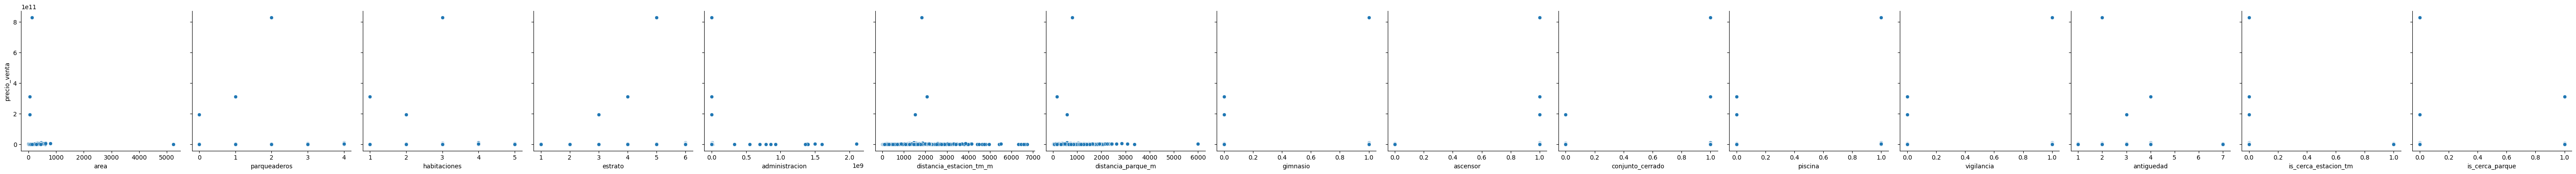

In [22]:
sns.pairplot(analisis_df.sample(frac=0.1), height=4, y_vars="precio_venta", x_vars=features, 
             kind="scatter")

### 2.2. Búsqueda de relaciones entre las variables de entrada

<AxesSubplot:>

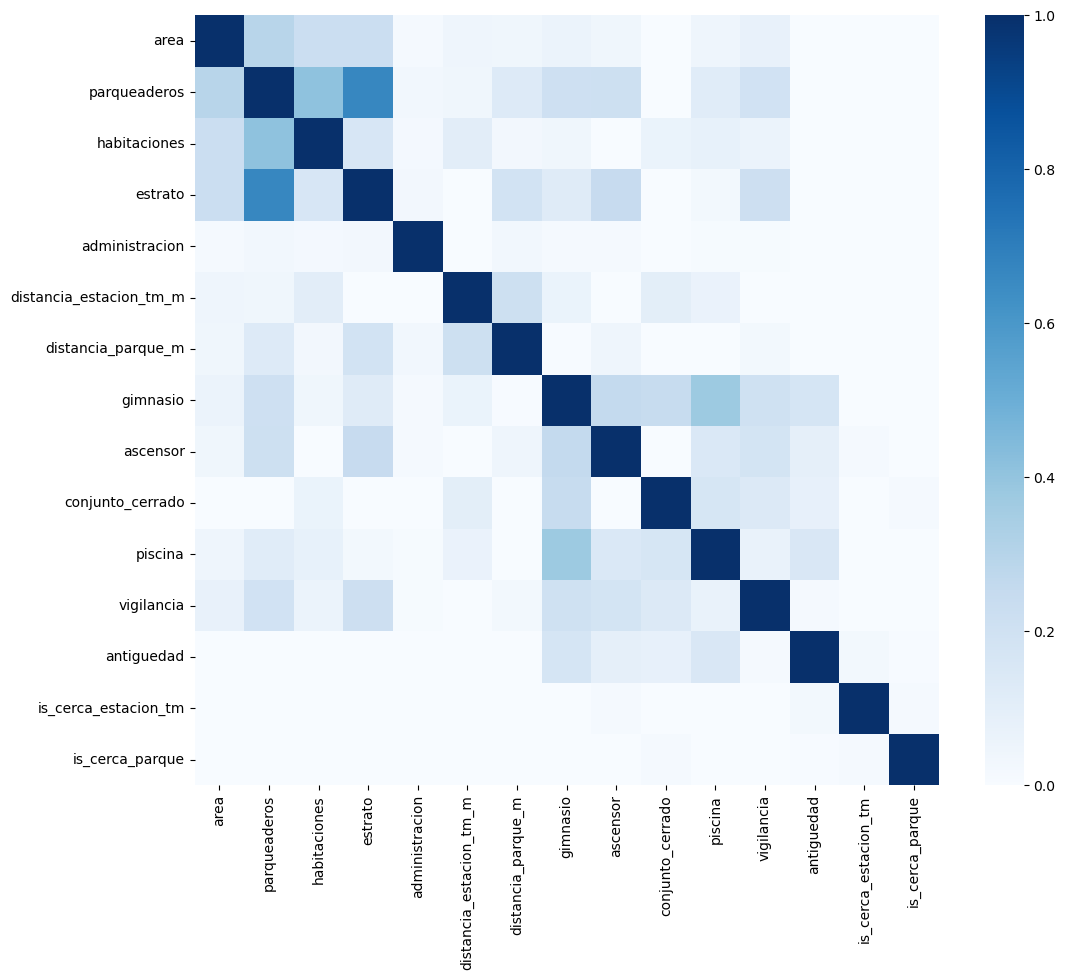

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(analisis_df[features].corr(), cmap="Blues", vmin=0, vmax=1)

## 3. Preparación de datos

In [24]:
total_rows = analisis_df.shape[0]
total_rows

25060

In [25]:
analisis_df.loc[analisis_df.duplicated(subset=features, keep=False)]

,precio_venta,area,parqueaderos,habitaciones,estrato,administracion,distancia_estacion_tm_m,distancia_parque_m,gimnasio,ascensor,conjunto_cerrado,piscina,vigilancia,antiguedad,is_cerca_estacion_tm,is_cerca_parque
21,130000000.0,47.0,0.0,3.0,2.0,78300.0,1894.68,880.66,0.0,0.0,1.0,0.0,0.0,2.0,0,0
25,139000000.0,47.0,0.0,3.0,2.0,78300.0,1894.68,880.66,0.0,0.0,1.0,0.0,0.0,2.0,0,0
49,131500000.0,45.0,0.0,2.0,2.0,68800.0,2313.69,335.80,0.0,0.0,1.0,0.0,0.0,2.0,0,1
162,150000000.0,47.0,0.0,2.0,2.0,77000.0,2899.36,1865.40,0.0,0.0,1.0,0.0,0.0,1.0,0,0
171,135000000.0,47.0,0.0,3.0,2.0,86500.0,2865.68,428.09,0.0,0.0,1.0,0.0,0.0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42886,452100000.0,87.0,1.0,3.0,5.0,464000.0,1281.37,1045.48,1.0,1.0,1.0,0.0,1.0,1.0,0,0
42894,450000000.0,90.0,1.0,3.0,5.0,630000.0,1004.44,1010.14,0.0,0.0,1.0,0.0,1.0,1.0,0,0
42902,586200000.0,84.0,1.0,3.0,3.0,413000.0,1076.32,655.77,0.0,1.0,0.0,0.0,0.0,4.0,0,0
42907,578600000.0,84.0,1.0,3.0,3.0,413000.0,1076.32,655.77,0.0,1.0,0.0,0.0,0.0,4.0,0,0


In [26]:
duplicated_rows = analisis_df.loc[analisis_df.duplicated(subset=features, keep=False)].shape[0]
duplicated_rows

1221

In [27]:
print(f"Duplicates: {(duplicated_rows/total_rows)*100:.4f}%")

Duplicates: 4.8723%


In [28]:
analisis_df.loc[analisis_df.duplicated(subset=features+["precio_venta"], keep=False)]

,precio_venta,area,parqueaderos,habitaciones,estrato,administracion,distancia_estacion_tm_m,distancia_parque_m,gimnasio,ascensor,conjunto_cerrado,piscina,vigilancia,antiguedad,is_cerca_estacion_tm,is_cerca_parque
549,1.850000e+09,300.00,4.0,4.0,3.0,2500000.0,2368.03,626.19,0.0,1.0,0.0,0.0,0.0,1.0,0,0
605,7.500000e+08,121.73,1.0,3.0,6.0,900000.0,1547.06,569.72,0.0,1.0,1.0,0.0,1.0,7.0,0,0
608,3.550000e+08,59.00,1.0,2.0,3.0,400000.0,894.60,934.24,1.0,1.0,1.0,0.0,1.0,4.0,0,0
627,1.800000e+09,178.00,2.0,3.0,6.0,1300000.0,812.21,357.97,1.0,1.0,1.0,0.0,1.0,3.0,0,1
797,6.200000e+08,126.00,3.0,3.0,6.0,810000.0,2386.68,721.28,0.0,1.0,1.0,0.0,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42797,1.820000e+08,45.00,0.0,2.0,3.0,10000.0,1897.19,677.33,0.0,0.0,1.0,0.0,0.0,1.0,0,0
42841,4.800000e+08,68.00,1.0,2.0,5.0,600000.0,372.65,615.56,0.0,0.0,0.0,0.0,0.0,2.0,1,0
42842,4.800000e+08,68.00,1.0,2.0,5.0,600000.0,372.65,615.56,0.0,0.0,0.0,0.0,0.0,2.0,1,0
42882,1.898000e+09,210.00,3.0,3.0,6.0,1622100.0,222.52,1534.26,0.0,1.0,0.0,0.0,0.0,2.0,1,0


In [29]:
duplicated_rows = analisis_df.loc[analisis_df.duplicated(subset=features+["precio_venta"], keep=False)].shape[0]
duplicated_rows

948

In [30]:
print(f"Duplicates: {(duplicated_rows/total_rows)*100:.4f}%")

Duplicates: 3.7829%


Aquí hay dos escenarios a analizar:
1. Existe un ~10.57% de registros con variables de entrada duplicadas, incluso con variable objetivo diferente. Una cantidad no muy preocupante pero que, en términos generales, requeriría de un proceso complementario de limpieza de datos para evitar confundir al modelo al momento de aprender la función de estimación.
2. Al incluir la variable objetivo dentro del análisis de duplicados, se obtiene el ~6.4% registros duplicados adicionales. Para un porcentaje mayor esto representaría potencialmente otro problema obligando al algoritmo de optimización a enfocarse más en aquellos registros duplicados en lugar de ponderar todos los registros por igual.

In [31]:
analisis_df.drop_duplicates(subset=features, inplace=True)
analisis_df.drop_duplicates(subset=features+["precio_venta"], inplace=True)

In [32]:
analisis_df.shape

(24356, 16)

## 4. Particionamiento del conjunto de datos en entrenamiento y prueba

Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos previamente desconocidos.

Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(analisis_df[features], analisis_df["precio_venta"], test_size=0.2, random_state=82)

In [34]:
X_train.shape, y_train.shape

((19484, 15), (19484,))

In [35]:
X_test.shape, y_test.shape

((4872, 15), (4872,))

## 5. Entrenamiento de un primer modelo de regresión lineal

In [36]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [37]:


pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

### 5.1. Interpretación de los coeficientes y del intercepto

Los coeficientes de la regresión brindan una intuición del impacto o la fuerza de una variable de entrada en la predicción/estimación de la variable objetivo.

In [38]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,area,1.497200e+08
1,parqueaderos,2.730679e+09
2,habitaciones,-8.477302e+07
3,estrato,-7.277583e+07
4,administracion,1.699348e+09
5,distancia_estacion_tm_m,6.781576e+08
6,distancia_parque_m,3.875170e+08
7,gimnasio,-1.209943e+08
8,ascensor,5.355109e+08
9,conjunto_cerrado,1.090094e+09


In [39]:
pipeline["model"].intercept_

2674711850.828731

In [40]:
y_train.mean(), y_test.mean()

(2674711850.828731, 1788593104.0792282)

### 5.2. Validación (evaluación) del modelo

La forma más básica para saber que tan bien se comporta el modelo es midiendo que tanto se alejan las estimaciones o predicciones del mismo respecto a la variable objetivo real. Esta medición se puede hacer tanto para el conjunto de datos de entrenamiento como para el de prueba.

In [41]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 4026628408.279647
Test: 3057508037.5278172

RMSE:
Train: 61792005333.68596
Test: 46649097888.8077


## 6. Validación de supuestos de la regresión

La construcción de un buen modelo de Machine Learning va más allá de solamente minimizar las métricas de error. El modelo de regresión lineal, desde una perspectiva clásica, debería además cumplir con los siguientes supuestos:

*Se volverán a revisar algunos aspectos que se habían descubierto en la etapa de entendimiento de los datos.*

### 6.1. Colinealidad

Es necesario que las variables utilizadas no tengan (o tengan muy baja) colinealidad (correlación).

<AxesSubplot:>

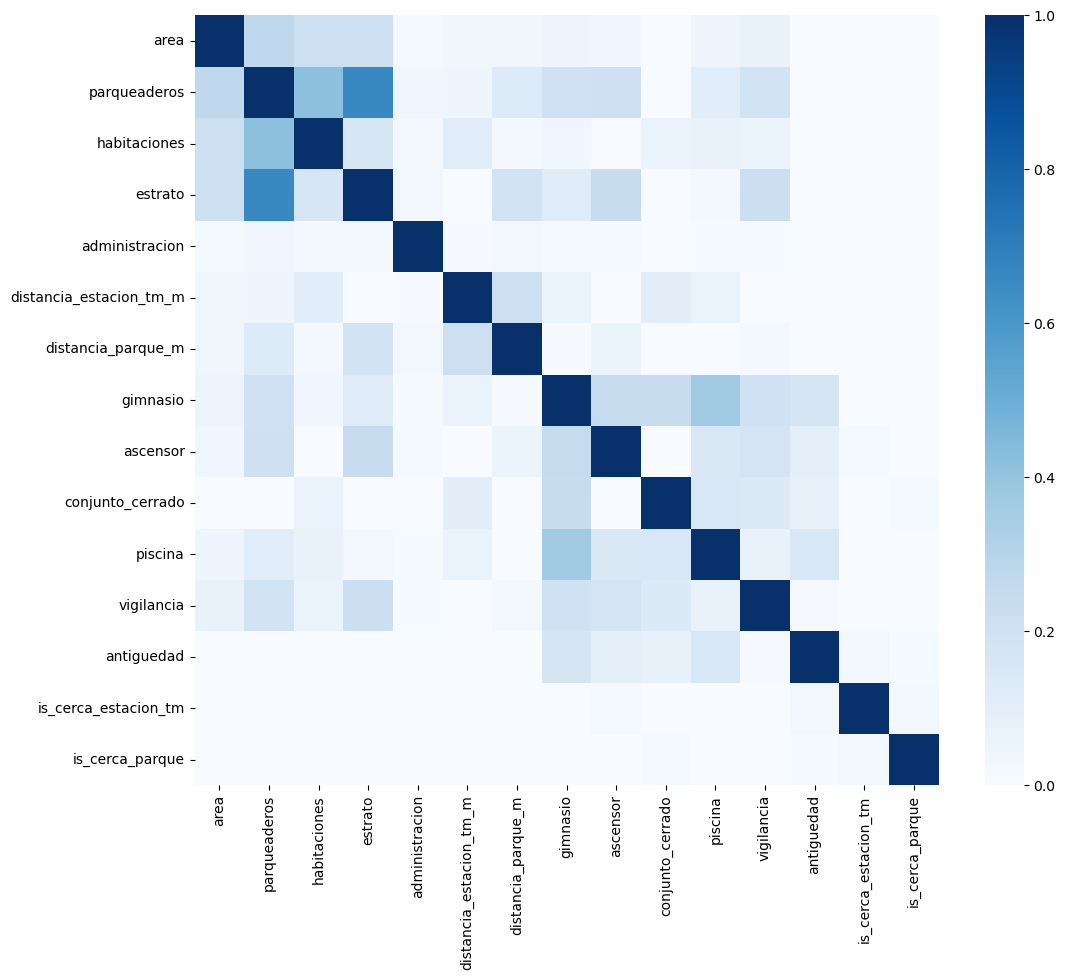

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [43]:
X_train.corr()

,area,parqueaderos,habitaciones,estrato,administracion,distancia_estacion_tm_m,distancia_parque_m,gimnasio,ascensor,conjunto_cerrado,piscina,vigilancia,antiguedad,is_cerca_estacion_tm,is_cerca_parque
area,1.000000,0.272889,0.211741,0.213082,0.016889,0.042923,0.042135,0.054642,0.036458,-0.015759,0.044562,0.070741,-0.044971,-0.038246,-0.018759
parqueaderos,0.272889,1.000000,0.418577,0.663548,0.036445,0.043676,0.131665,0.203908,0.207932,-0.071130,0.111461,0.190404,-0.057003,-0.079805,-0.063310
habitaciones,0.211741,0.418577,1.000000,0.166777,0.021344,0.110754,0.024567,0.038052,-0.005974,0.062893,0.073619,0.058906,-0.191426,-0.112589,-0.003083
estrato,0.213082,0.663548,0.166777,1.000000,0.030190,-0.003707,0.190493,0.122570,0.243894,-0.179648,0.023826,0.220636,-0.125622,-0.063251,-0.094788
administracion,0.016889,0.036445,0.021344,0.030190,1.000000,0.004109,0.033032,0.019198,0.017794,-0.003261,0.009478,0.009694,-0.005744,-0.005160,-0.019594
distancia_estacion_tm_m,0.042923,0.043676,0.110754,-0.003707,0.004109,1.000000,0.214509,0.069273,-0.036683,0.102292,0.067915,-0.026161,-0.007744,-0.574112,-0.129187
distancia_parque_m,0.042135,0.131665,0.024567,0.190493,0.033032,0.214509,1.000000,0.004767,0.054757,-0.036008,-0.021825,0.021074,-0.032575,-0.031287,-0.666001
gimnasio,0.054642,0.203908,0.038052,0.122570,0.019198,0.069273,0.004767,1.000000,0.249053,0.243338,0.370759,0.203929,0.173257,-0.028645,-0.028078
ascensor,0.036458,0.207932,-0.005974,0.243894,0.017794,-0.036683,0.054757,0.249053,1.000000,-0.003172,0.146666,0.179425,0.091546,0.016889,-0.050544
conjunto_cerrado,-0.015759,-0.071130,0.062893,-0.179648,-0.003261,0.102292,-0.036008,0.243338,-0.003172,1.000000,0.158629,0.140469,0.077983,-0.044806,0.017759


La colinealidad entre las variables de entrada no es significativa, por lo que no se considerará eliminar ninguna para el entrenamiento del modelo.

### 6.2. Linealidad

Es necesario que la relación entre cada variable de entrada y la variable objetivo sea lineal.


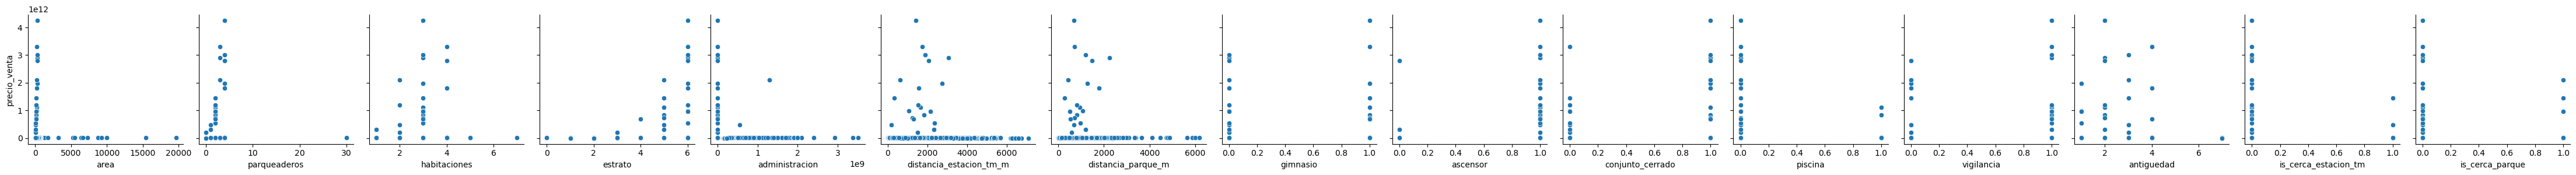

In [44]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=3, y_vars="precio_venta", x_vars=features, kind="scatter")

In [45]:
pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [46]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [47]:
pd.DataFrame({"columns": pipeline["poly"].get_feature_names_out(), "coef": pipeline["model"].coef_})

,columns,coef
0,area,2.529175e+10
1,parqueaderos,-1.546758e+10
2,habitaciones,-4.629866e+09
3,estrato,1.749658e+09
4,administracion,1.273769e+10
...,...,...
130,antiguedad is_cerca_estacion_tm,3.085107e+07
131,antiguedad is_cerca_parque,-2.499789e+08
132,is_cerca_estacion_tm^2,-1.778668e+20
133,is_cerca_estacion_tm is_cerca_parque,6.434079e+08


In [48]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 5394121884.422181
Test: 4463461903.910773

RMSE:
Train: 61135941417.74211
Test: 47184652099.67405


### 6.3. Normalidad de los errores

Los errores deben tener una distribución normal.

In [49]:
errors = (pipeline.predict(X_train)-y_train).values

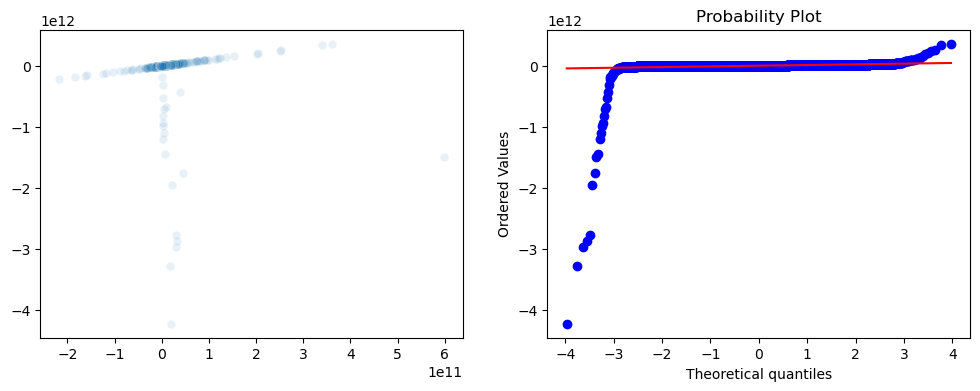

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

### 6.3.1 Búsqueda de outliers

Para determinar los valores atípicos a remover se puede aplicar la regla $$outlier > Q3 + 1.5*IQR$$

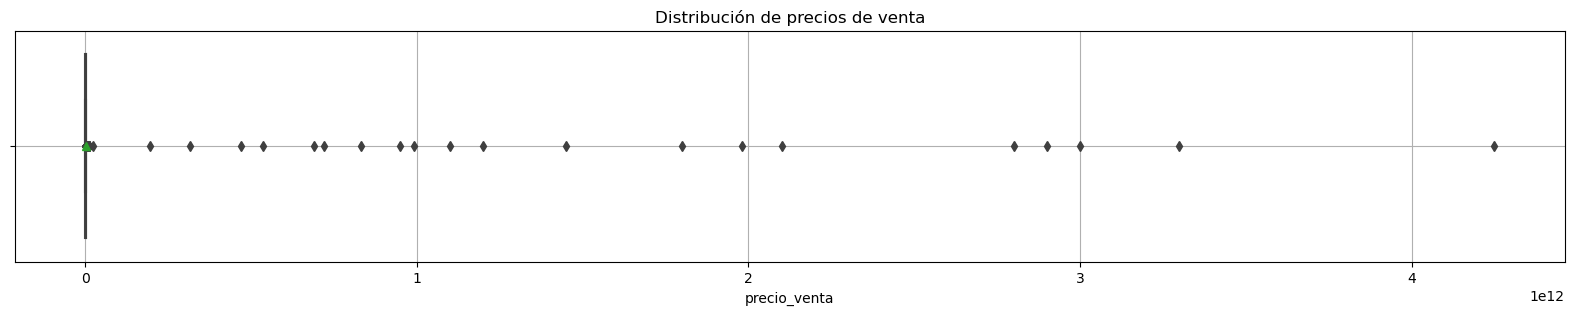

In [51]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_train, showmeans=True, orient="h")
plt.title("Distribución de precios de venta")
plt.grid()
plt.show()

In [52]:
q1_precio = y_train.quantile(0.25)
q3_precio = y_train.quantile(0.75)
iqr_precio = q3_precio-q1_precio
threshold_precio = q3_precio+1.5*iqr_precio
threshold_precio

2745000375.0

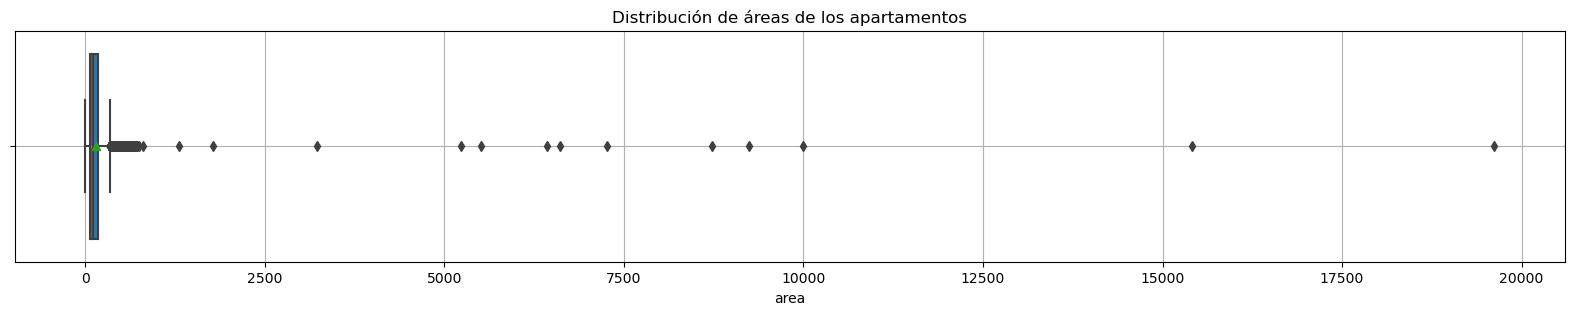

In [53]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=X_train['area'], showmeans=True, orient="h")
plt.title("Distribución de áreas de los apartamentos")
plt.grid()
plt.show()

In [54]:
q1_area = X_train['area'].quantile(0.25)
q3_area = X_train['area'].quantile(0.75)
iqr_area = q3_area-q1_area
threshold_area = q3_area+1.5*iqr_area
threshold_area

345.0

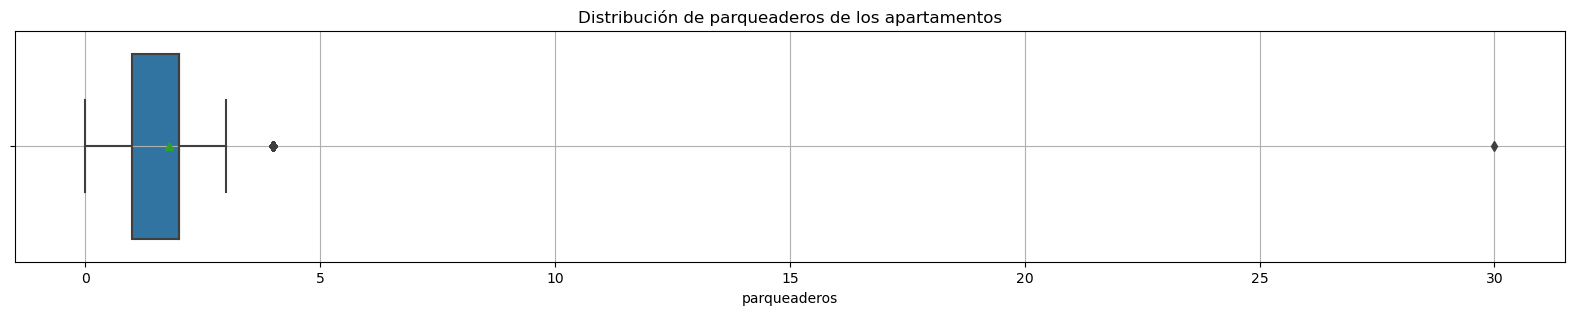

In [55]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=X_train['parqueaderos'], showmeans=True, orient="h")
plt.title("Distribución de parqueaderos de los apartamentos")
plt.grid()
plt.show()

In [56]:
q1_parqueaderos = X_train['parqueaderos'].quantile(0.25)
q3_parqueaderos = X_train['parqueaderos'].quantile(0.75)
iqr_parqueaderos = q3_parqueaderos-q1_parqueaderos
threshold_parqueaderos = q3_parqueaderos+1.5*iqr_parqueaderos
threshold_parqueaderos

3.5

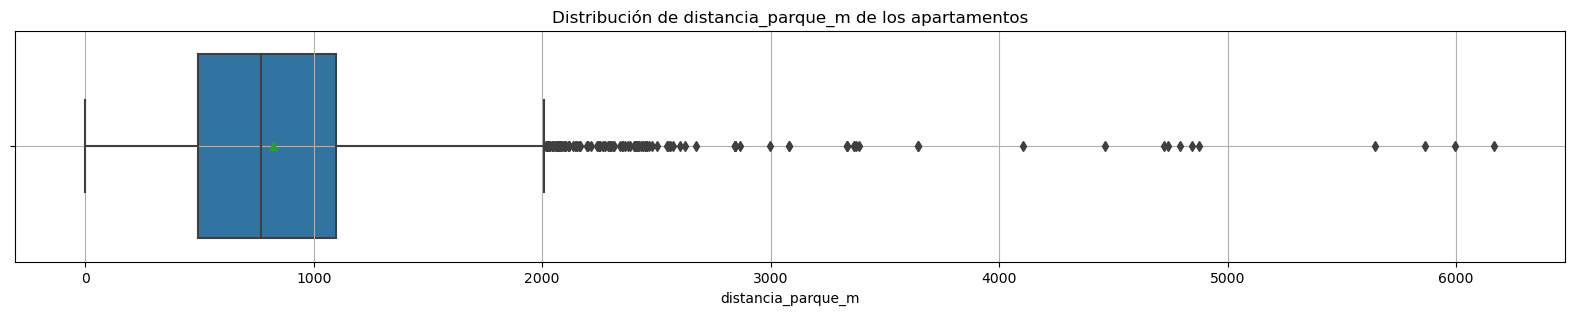

In [57]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=X_train['distancia_parque_m'], showmeans=True, orient="h")
plt.title("Distribución de distancia_parque_m de los apartamentos")
plt.grid()
plt.show()

In [58]:
q1_parque = X_train['distancia_parque_m'].quantile(0.25)
q3_parque = X_train['distancia_parque_m'].quantile(0.75)
iqr_parque = q3_parque-q1_parque
threshold_parque = q3_parque+1.5*iqr_parque
threshold_parque

2011.27625

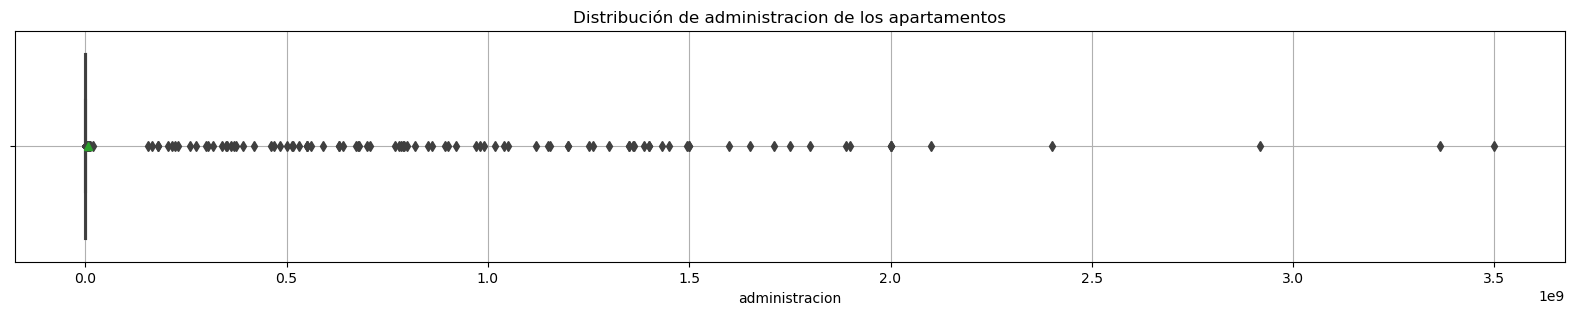

In [59]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=X_train['administracion'], showmeans=True, orient="h")
plt.title("Distribución de administracion de los apartamentos")
plt.grid()
plt.show()

In [60]:
q1_administracion = X_train['administracion'].quantile(0.25)
q3_administracion = X_train['administracion'].quantile(0.75)
iqr_administracion = q3_administracion-q1_administracion
threshold_administracion = q3_administracion+1.5*iqr_administracion
threshold_administracion

2475000.0

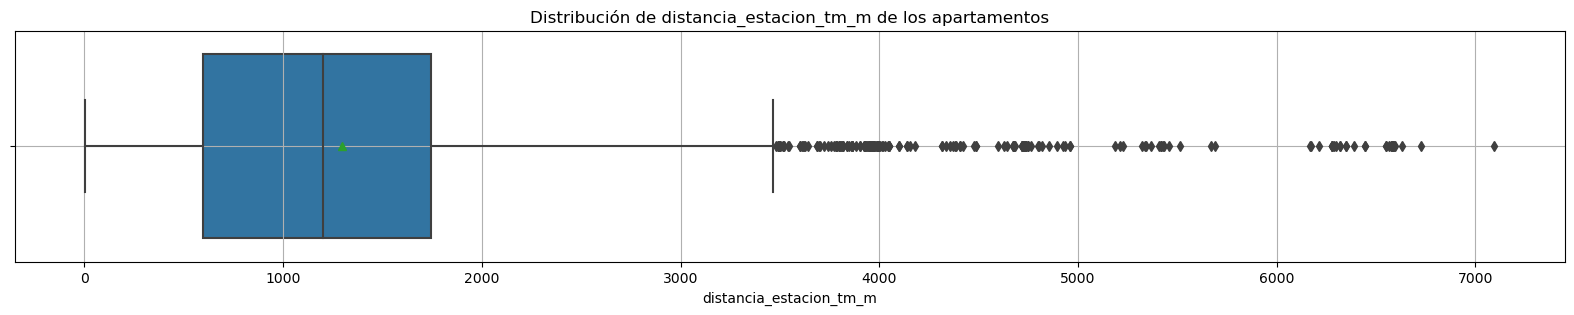

In [61]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=X_train['distancia_estacion_tm_m'], showmeans=True, orient="h")
plt.title("Distribución de distancia_estacion_tm_m de los apartamentos")
plt.grid()
plt.show()

In [62]:
q1_estacion = X_train['distancia_estacion_tm_m'].quantile(0.25)
q3_estacion = X_train['distancia_estacion_tm_m'].quantile(0.75)
iqr_estacion = q3_estacion-q1_estacion
threshold_estacion = q3_estacion+1.5*iqr_estacion
threshold_estacion

3466.44375

In [63]:
y_train = y_train.loc[(y_train <= threshold_precio) & (X_train['area']<=threshold_area) & 
                     (X_train['administracion']<=threshold_administracion) & 
                     (X_train['distancia_parque_m']<=threshold_parque) & (X_train['parqueaderos']<=threshold_parqueaderos) &
                     (X_train['distancia_estacion_tm_m']<=threshold_estacion)]
X_train = X_train.loc[y_train.index]

In [64]:
y_test = y_test.loc[(y_test <= threshold_precio) & (X_test['area']<=threshold_area) & 
                     (X_test['administracion']<=threshold_administracion) & 
                     (X_test['distancia_parque_m']<=threshold_parque) & (X_test['parqueaderos']<=threshold_parqueaderos) &
                     (X_test['distancia_estacion_tm_m']<=threshold_estacion)]
X_test = X_test.loc[y_test.index]

In [65]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [66]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [67]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,area,3.284235e+08
1,parqueaderos,4.270718e+07
2,habitaciones,-4.380417e+07
3,estrato,2.601169e+07
4,administracion,1.476494e+08
5,distancia_estacion_tm_m,3.499927e+06
6,distancia_parque_m,-1.570034e+07
7,gimnasio,3.835320e+07
8,ascensor,-7.735705e+06
9,conjunto_cerrado,-4.594224e+06


In [68]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 143182461.7683634
Test: 148672615.00989163

RMSE:
Train: 217651547.24762723
Test: 233556291.9927052


In [69]:
errors = (pipeline.predict(X_train)-y_train).values

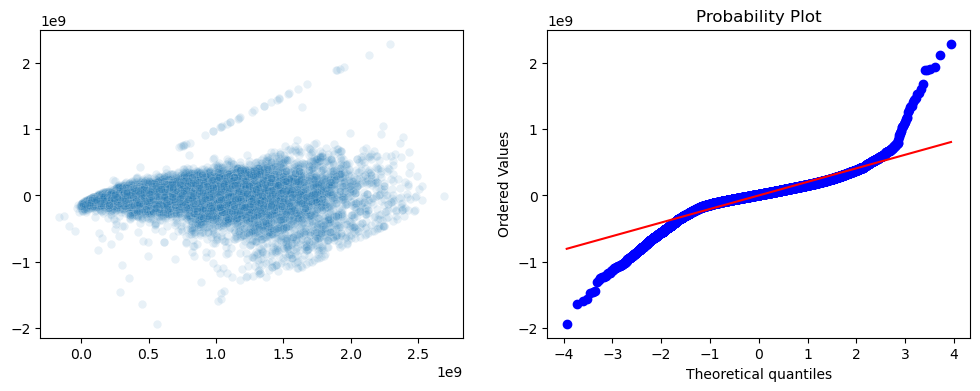

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

### 6.3.2 Búsqueda de outliers, n-iteraciones

In [71]:
n=1
old_shape=0
new_shape=X_train.shape[0]+X_test.shape[0]

In [72]:
while old_shape!=new_shape:
    m_precio = y_train.mean()
    std_precio = y_train.std()
    threshold_sup_precio = m_precio+2*std_precio
    threshold_inf_precio = m_precio-2*std_precio
    
    q1_area = X_train['area'].quantile(0.25)
    q3_area = X_train['area'].quantile(0.75)
    iqr_area = q3_area-q1_area
    threshold_area = q3_area+1.5*iqr_area  
    
    q1_parqueaderos = X_train['parqueaderos'].quantile(0.25)
    q3_parqueaderos = X_train['parqueaderos'].quantile(0.75)
    iqr_parqueaderos = q3_parqueaderos-q1_parqueaderos
    threshold_parqueaderos = q3_parqueaderos+1.5*iqr_parqueaderos
    
    q1_parque = X_train['distancia_parque_m'].quantile(0.25)
    q3_parque = X_train['distancia_parque_m'].quantile(0.75)
    iqr_parque = q3_parque-q1_parque
    threshold_parque = q3_parque+1.5*iqr_parque
    
    q1_administracion = X_train['administracion'].quantile(0.25)
    q3_administracion = X_train['administracion'].quantile(0.75)
    iqr_administracion = q3_administracion-q1_administracion
    threshold_administracion = q3_administracion+1.5*iqr_administracion
    
    q1_estacion = X_train['distancia_estacion_tm_m'].quantile(0.25)
    q3_estacion = X_train['distancia_estacion_tm_m'].quantile(0.75)
    iqr_estacion = q3_estacion-q1_estacion
    threshold_estacion = q3_estacion+1.5*iqr_estacion
    
    y_train = y_train.loc[(y_train <= threshold_sup_precio) & (y_train >= threshold_inf_precio) & (X_train['area']<=threshold_area) & 
                     (X_train['administracion']<=threshold_administracion) & 
                     (X_train['distancia_parque_m']<=threshold_parque) & (X_train['parqueaderos']<=threshold_parqueaderos) &
                     (X_train['distancia_estacion_tm_m']<=threshold_estacion)]
    X_train = X_train.loc[y_train.index]
    
    y_test = y_test.loc[(y_test <= threshold_sup_precio) & (y_test >= threshold_inf_precio) & (X_test['area']<=threshold_area) & 
                     (X_test['administracion']<=threshold_administracion) & 
                     (X_test['distancia_parque_m']<=threshold_parque) & (X_test['parqueaderos']<=threshold_parqueaderos) &
                     (X_test['distancia_estacion_tm_m']<=threshold_estacion)]
    X_test = X_test.loc[y_test.index]
    
    pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
    )
    
    pipeline.fit(X_train, y_train)
    
    print('\n* Iteración número '+str(n)+'.\n')
    print("MAE:")
    print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
    print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
    print("\nRMSE:")
    print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
    print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))
    
    old_shape=new_shape
    new_shape=X_train.shape[0]+X_test.shape[0]
    n+=1


* Iteración número 1.

MAE:
Train: 115322170.7103894
Test: 119720835.44786988

RMSE:
Train: 166384232.9712147
Test: 181105519.65180114

* Iteración número 2.

MAE:
Train: 100801587.98849493
Test: 102053598.30840953

RMSE:
Train: 143741056.6870783
Test: 152750812.13229606

* Iteración número 3.

MAE:
Train: 89176392.39347066
Test: 89335127.63517942

RMSE:
Train: 126907569.0581788
Test: 132374678.04567094

* Iteración número 4.

MAE:
Train: 78214795.81959684
Test: 79951292.14876701

RMSE:
Train: 109984624.88050437
Test: 119105840.49475987

* Iteración número 5.

MAE:
Train: 70586044.67411424
Test: 69768648.82529862

RMSE:
Train: 94643916.85349251
Test: 92490680.37233566

* Iteración número 6.

MAE:
Train: 68227429.962838
Test: 67637532.19776255

RMSE:
Train: 91418867.71078274
Test: 89901995.16288596

* Iteración número 7.

MAE:
Train: 65925175.8248407
Test: 66097710.85388528

RMSE:
Train: 88127428.70581204
Test: 87916277.94797657

* Iteración número 8.

MAE:
Train: 63935829.61305629
Tes

In [73]:
X_train.shape,y_train.shape

((10091, 15), (10091,))

In [74]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,area,9.246902e+07
1,parqueaderos,2.742415e+07
2,habitaciones,-1.281739e+07
3,estrato,3.675902e+07
4,administracion,3.134067e+07
5,distancia_estacion_tm_m,-1.298367e+07
6,distancia_parque_m,-3.443018e+06
7,gimnasio,1.525253e+07
8,ascensor,9.526650e+06
9,conjunto_cerrado,-4.531689e+06


In [75]:
pipeline['model'].intercept_

444163929.71003866

In [76]:
errors = (pipeline.predict(X_train)-y_train).values

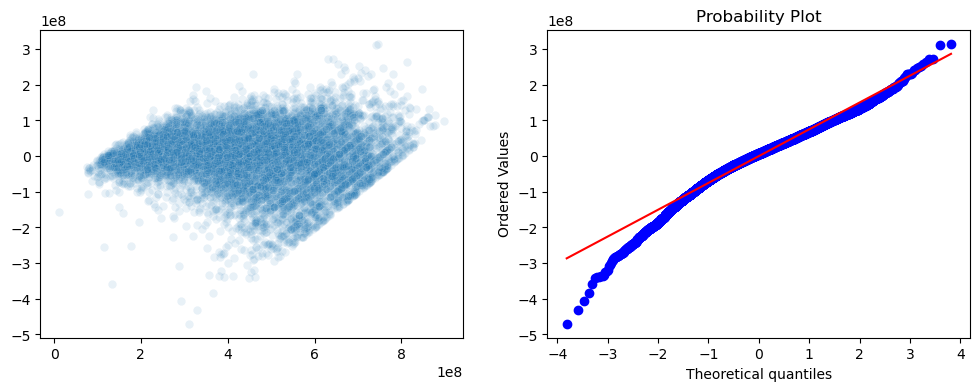

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

### 6.4 Varianza constante (Homocedasticidad)

La varianza en los errores debe mantenerse constante a medida que varia la variable objetivo.

<AxesSubplot:>

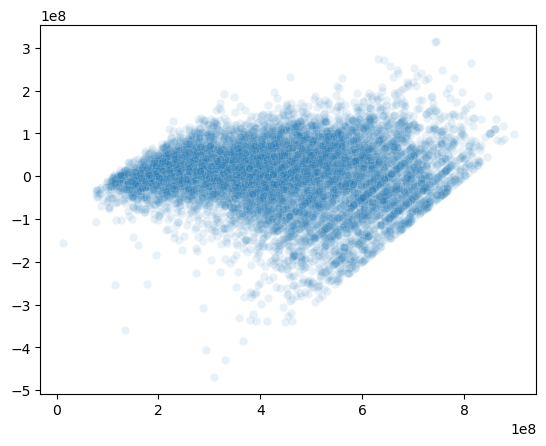

In [78]:
sns.scatterplot(x = pipeline.predict(X_train), y=errors, alpha=0.1)

### 7. Evaluación con los datos de test

In [79]:
y_test_pred=pipeline.predict(X_test)

In [80]:
test_errors=[]
test_errors_over_20=[]
for i in range(len(y_test_pred)):
    error=y_test_pred[i]-y_test.values[i]
    test_errors.append(error)
    if error<-20000000:
        test_errors_over_20.append(error)

In [81]:
len(test_errors_over_20)/len(test_errors)

0.3378432152805412

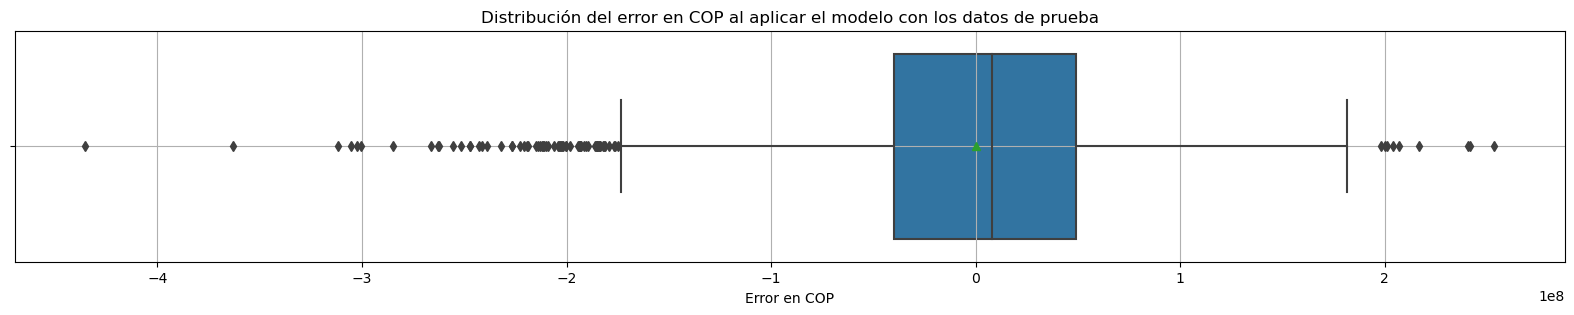

In [82]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=test_errors, showmeans=True, orient="h")
plt.title("Distribución del error en COP al aplicar el modelo con los datos de prueba")
plt.xlabel('Error en COP')
plt.grid()
plt.show()

In [83]:
pd.Series(test_errors).describe()

count    2.513000e+03
mean     1.615917e+05
std      7.571999e+07
min     -4.352566e+08
25%     -4.011980e+07
50%      7.726569e+06
75%      4.899097e+07
max      2.535370e+08
dtype: float64

##### 8. Persistencia del modelo

Una vez que el modelo está listo, ¿cómo ponerlo en producción para que realice estimaciones para datos futuos?

Se debe empezar por persistir el modelo a un archivo binario para que posteriormente pueda ser reutilizado desde cualquier script o servicio.

In [84]:
filename = "aptPriceEstimator.joblib"

In [85]:
dump(pipeline, filename)

['aptPriceEstimator.joblib']